In [137]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last"
from importlib import reload
import pandas as pd
%autoreload 2
pd.set_option("display.precision",2)

In [166]:
import pandas as pd
df = pd.read_pickle("irradiance2014.pickle")['2013']

# Apply the heating model
import bau
b = bau.BAU(df)
b.apply()
df = b.df

import hsolar
reload(hsolar)

hsol = hsolar.HSolar(df)
hsol.apply()
df = hsol.df
#hsol.savheat()

<module 'hsolar' from '/home/at/Dropbox/Exergy/Project/HouseModels/hsolar.py'>

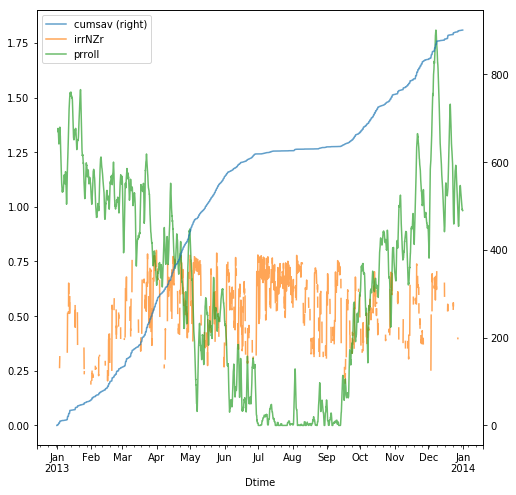

In [167]:
import matplotlib.pyplot as plt
pdf['cumsav']=(df.hload-df.rload).cumsum().copy()
pdf['prroll'] = df.prload.rolling(24).mean()

irrNZ = df.IrrDrN[df.IrrDrN>.1] 
irrNZdt = df.IrrDrN[df.sunalt>0]
pdf['irrNZr'] = irrNZ.rolling(12).mean()
#pdf.drop('prload',axis=1,inplace=True)
pdf.plot(secondary_y='cumsav',alpha=.7,figsize=(8,8))


In [175]:
df.sav.sum() / df.prload.sum()

0.1584116051469222

In [169]:
df.sav.sum()

901.0533841145188

In [150]:
df.hload.sum()

5688.051599999999